# Multi-layer Perceptron Regression

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with ''no'' activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

import numpy as np
boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

X=X[y<50]
y=y[y<50]

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)


from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor
import numpy as np

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(8),(10, 5), (20,10,5), (10,5,3)],
              'solver' : ['sgd'],
              #'batch_size': [20],
              #'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(-1, 3),
              'max_iter':[10000]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [2]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.869242 using {'alpha': 10.0, 'hidden_layer_sizes': (10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.842656 (0.008542) with: {'alpha': 10.0, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'sgd'}
0.869242 (0.015231) with: {'alpha': 10.0, 'hidden_layer_sizes': (10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.866685 (0.027063) with: {'alpha': 10.0, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 10000, 'solver': 'sgd'}
-0.000622 (0.000493) with: {'alpha': 10.0, 'hidden_layer_sizes': (10, 5, 3), 'max_iter': 10000, 'solver': 'sgd'}
0.843215 (0.015876) with: {'alpha': 1.0, 'hidden_layer_sizes': 8, 'max_iter': 10000, 'solver': 'sgd'}
0.852322 (0.017761) with: {'alpha': 1.0, 'hidden_layer_sizes': (10, 5), 'max_iter': 10000, 'solver': 'sgd'}
0.852071 (0.013268) with: {'alpha': 1.0, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 10000, 'solver': 'sgd'}
-0.000317 (0.000227) with: {'alpha': 1.0, 'hidden_layer_sizes': (10, 5, 3), 'max_iter': 10000, 'solver': 

0.8768901794229843

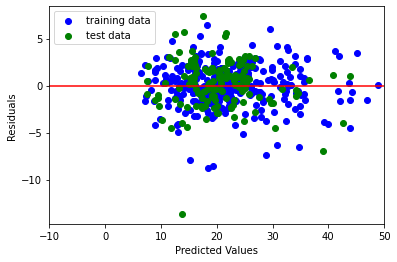

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [4]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  1.613347601071954
MSE train:  4.68107622911431
RMSE train:  2.1635794945215925
r2:  0.9632257788411017
MAE test:  1.8965410037121826
MSE test:  6.464206636342328
RMSE test:  2.5424804102180074
r2:  0.9364241450448533


In [5]:
import pandas as pd 

error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

pd.DataFrame(error_train).describe()

,0
count,343.000000
mean,-0.040369
std,2.172293
min,-8.740104
25%,-1.198438
50%,0.115413
75%,1.377822
max,6.531517


In [6]:
nb_error_train = np.array(error_train).flatten()

error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()

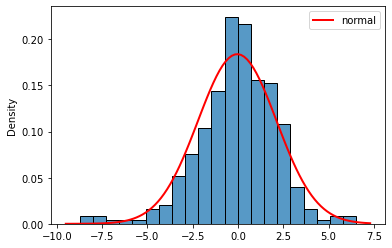

In [7]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns


# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error_train))


# plot the distribution and compare with a normal

ax = sns.histplot(nb_error_train, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

#plt.hist(nb_error_train,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()